# 04 Feature scaling and Machine Learning

In this notebook, the following methods are used: <br>
<b>Train test split ratio</b>: test size = 0.25 <br>
<b>Scaling method</b>: min-max scalar <br>
<b>Models</b>: decision tree, RF, NB, XGB, linear regression

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
df = pd.read_csv('./datasets/cleaned_training_data.csv')

In [15]:
df

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,month,week,B,C
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421566,45,94,5203.31,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421567,45,95,56017.47,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421568,45,97,6817.48,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0


In [16]:
#convert the data into results and features
y = df['Weekly_Sales']
X = df.drop('Weekly_Sales',axis = 1)

In [17]:
X

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,month,week,B,C
0,1,1,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
1,1,2,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
2,1,3,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
3,1,4,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
4,1,5,0,42.31,2.572,211.096358,8.106,151315,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421566,45,94,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421567,45,95,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0
421568,45,97,0,58.85,3.882,192.308899,8.667,118221,10,4,1,0


In [18]:
y

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [19]:
X.describe()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,month,week,B,C
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,0.070358,60.090059,3.361027,171.201947,7.960289,136727.915739,6.449510,2.943134,0.387824,0.101044
std,12.785297,30.492054,0.255750,18.447931,0.458515,39.159276,1.863296,60980.583328,3.243217,1.299199,0.487255,0.301387
min,1.000000,1.000000,0.000000,-2.060000,2.472000,126.064000,3.879000,34875.000000,1.000000,1.000000,0.000000,0.000000
25%,11.000000,18.000000,0.000000,46.680000,2.933000,132.022667,6.891000,93638.000000,4.000000,2.000000,0.000000,0.000000
50%,22.000000,37.000000,0.000000,62.090000,3.452000,182.318780,7.866000,140167.000000,6.000000,3.000000,0.000000,0.000000
75%,33.000000,74.000000,0.000000,74.280000,3.738000,212.416993,8.572000,202505.000000,9.000000,4.000000,1.000000,0.000000
max,45.000000,99.000000,1.000000,100.140000,4.468000,227.232807,14.313000,219622.000000,12.000000,5.000000,1.000000,1.000000


# 1) Split the data 

In [20]:
#Splitting the data into training & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [21]:
X_train

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,month,week,B,C
140387,15,80,0,57.94,2.846,132.767067,8.099,123737,9,3,1,0
105652,11,20,0,67.16,3.787,224.790910,6.833,207499,3,4,0,0
73498,8,31,0,73.14,3.786,218.933399,6.297,155078,5,5,0,0
203354,21,11,0,71.64,3.285,216.695831,7.441,140167,10,2,1,0
329039,34,56,0,61.92,3.685,131.145333,9.575,158114,5,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359783,38,91,0,77.27,4.186,131.145333,11.627,39690,5,2,0,1
358083,38,21,0,83.26,3.877,129.606067,13.503,39690,9,5,0,1
152315,16,34,0,43.29,3.767,192.826069,6.339,57197,5,3,1,0
117952,13,51,0,40.65,2.681,126.578286,8.316,219622,3,1,0,0


In [22]:
y_train

140387       29.14
105652    10127.75
73498       603.60
203354    10484.16
329039    11944.67
            ...   
359783    27780.67
358083     1154.11
152315     5765.71
117952       23.38
305711    34551.97
Name: Weekly_Sales, Length: 316177, dtype: float64

## 2) Feature scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))   #set the output range

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# summarize transformed data
np.set_printoptions(precision=3)  #correct to 3 decimal places when printing the result, has NOTHING to do with the transoform


In [24]:
X_train.shape, X_test.shape

((316177, 12), (105393, 12))

# 3) Machine Learning

## a) Linear Regression

In [25]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [26]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [-6271.926 10799.813   915.895   231.581  -214.614 -2570.903 -2526.951
 18233.408  2102.53   -675.591  -347.767  5761.469]
Mean Absolute Error: 14600.017626132782
Mean squared error: 475781540.24
Root Mean squared error: 21812.42
Variance score: 0.09


## b) Decision tree regressor

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [28]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 1844.7582897346124
Mean Squared Error: 20749761.322896793
Root Mean Squared Error: 4555.190591281203
Variance score: 0.96


## c) Random Forest regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

In [69]:
y_pred = regressor.predict(X_test)

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 1402.7415138794797
Mean Squared Error: 12378368.045030642
Root Mean Squared Error: 3518.290500375238
Variance score: 0.98


# d) Linear regression with store number, IsHoliday dropped

In [18]:
#drop the IsHoliday and Store Number columns
#X_train = X_train.drop(['Store','IsHoliday'],axis = 1)
#X_test = X_test.drop(['Store','IsHoliday'],axis = 1)

In [19]:
X_train

,Dept,Temperature,Fuel_Price,CPI,Unemployment,Size,month,week,B,C
140387,80,57.94,2.846,132.767067,8.099,123737,9,3,1,0
105652,20,67.16,3.787,224.790910,6.833,207499,3,4,0,0
73498,31,73.14,3.786,218.933399,6.297,155078,5,5,0,0
203354,11,71.64,3.285,216.695831,7.441,140167,10,2,1,0
329039,56,61.92,3.685,131.145333,9.575,158114,5,2,0,0
...,...,...,...,...,...,...,...,...,...,...
359783,91,77.27,4.186,131.145333,11.627,39690,5,2,0,1
358083,21,83.26,3.877,129.606067,13.503,39690,9,5,0,1
152315,34,43.29,3.767,192.826069,6.339,57197,5,3,1,0
117952,51,40.65,2.681,126.578286,8.316,219622,3,1,0,0


In [21]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [ 1.09816147e+02  1.20994268e+01 -4.06918058e+02 -1.76398381e+01
 -3.43732375e+02  1.02800121e-01  1.82762317e+02 -1.70953636e+02
  5.62131983e+02  3.97379607e+03]
Mean squared error: 478275101.35
Root Mean squared error: 21869.50
Variance score: 0.08


## e) Adaboost

In [34]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 24676.84916936183
Mean squared error: 806166003.37
Root Mean squared error: 28393.06
Variance score: -0.54


## f) Gradient Boost

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)
h_pred = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 24676.84916936183
Mean squared error: 806166003.37
Root Mean squared error: 28393.06
Variance score: -0.54


## g) XGBoost

In [53]:
import xgboost

In [57]:
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [58]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
y_pred= model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 1901.154689060052
Mean squared error: 14429856.55
Root Mean squared error: 3798.67
Variance score: 0.97


## h) Extra tree

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

In [33]:
y_pred= et.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 1383.0349148476023
Mean squared error: 12201191.22
Root Mean squared error: 3493.02
Variance score: 0.98


## i) Lasso

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred_lasso = lasso.predict(X_test)

In [38]:
y_pred= y_pred_lasso
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 14599.291983576855
Mean squared error: 475780292.20
Root Mean squared error: 21812.39
Variance score: 0.09


# 4) PCA and KPCA

In [47]:
#Applying KPCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 4)

X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

MemoryError: Unable to allocate 745. GiB for an array with shape (316177, 316177) and data type float64

In [48]:
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
#pca = PCA(0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Decision Tree with PCA

In [49]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_pca, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
y_pred = regressor.predict(X_test_pca)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 7956.323306481455
Mean Squared Error: 330337599.2698079
Root Mean Squared Error: 18175.191863356158
Variance score: 0.37


Original Decision Tree: <br>
Mean Absolute Error: 1844.7582897346124 <br>
Mean Squared Error: 20749761.322896793 <br>
Root Mean Squared Error: 4555.190591281203 <br>
Variance score: 0.96

## Random Forest

In [138]:
# create regressor object
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
rf_regressor.fit(X_train_pca, y_train) 

RandomForestRegressor(random_state=0)

In [52]:
y_pred = rf_regressor.predict(X_test_pca)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 6909.918596207527
Mean Squared Error: 170376899.918364
Root Mean Squared Error: 13052.850260321076
Variance score: 0.67


Original Random Forest: <br>
Mean Absolute Error: 1402.7415138794797 <br>
Mean Squared Error: 12378368.045030642 <br>
Root Mean Squared Error: 3518.290500375238 <br>
Variance score: 0.98 <br>

# Feature importance

In [66]:
#XGBoost
importance = model.feature_importances_

<AxesSubplot:>

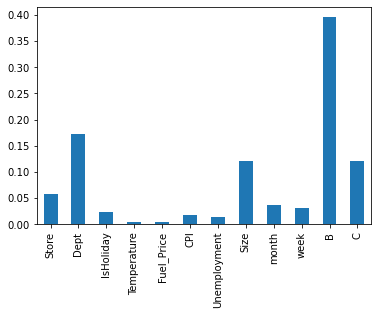

In [69]:
xgboost_importance = pd.Series(importance,index=X.columns)
xgboost_importance.plot(kind='bar')

In [139]:
#random forest
importances = rf_regressor.feature_importances_

forest_importances = pd.Series(importances, index=X.columns)

forest_importances.plot(kind='bar')

<AxesSubplot:>

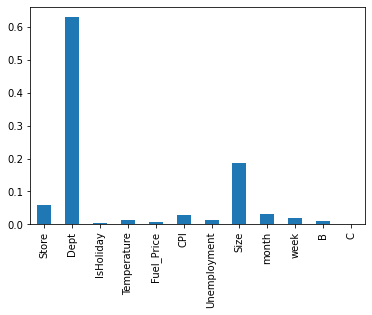

In [140]:
forest_importances.plot(kind='bar')

In [186]:
X = df.drop('Weekly_Sales',axis = 1)

In [232]:
#random forest with the 5 most prominent features:
X = X[['Store','Dept','Size','month','week']]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#rf_regressor.fit(X_train.drop(, y_train)  forest with the 3 most prominent features:


In [233]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))   #set the output range

X = sc.fit_transform(X)
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [234]:
rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
 
# fit the regressor with x and y data
rf_regressor.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [235]:
y_pred = rf_regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 2716.015589842331
Mean Squared Error: 55815207.803287655
Root Mean Squared Error: 7470.957622908034
Variance score: 0.89


# HPO

In [76]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
print(random_grid)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]}


In [77]:
# Use the random grid to search for best hyperparameters


# First create the base model to tune (XGBoost)
XGB = xgboost.XGBRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
XGB_random=RandomizedSearchCV(XGB,param_distributions=random_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# Fit the random search model
XGB_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

In [79]:
XGB_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [80]:
XGB_random.best_params_

{'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [82]:
best_XGB = xgboost.XGBRegressor(colsample_bytree = 0.3, gamma = 0.1, learning_rate = 0.05, 
                                 max_depth = 15, min_child_weight = 7)

In [83]:
best_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [84]:
y_pred = best_XGB.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 4366.382459572273
Mean Squared Error: 68566636.91888875
Root Mean Squared Error: 8280.497383544587
Variance score: 0.87


In [85]:
y_pred =XGB_random.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 4366.382459572273
Mean Squared Error: 68566636.91888875
Root Mean Squared Error: 8280.497383544587
Variance score: 0.87


In [86]:
#####2nd search
XGB_random=RandomizedSearchCV(XGB,param_distributions=random_grid,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
# Fit the random search model
XGB_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          reg_alpha=None, reg_lambda=None,
                                          scale_pos_weight=None, subsample=None,
                                   

In [88]:
XGB_random_best = XGB_random.best_estimator_

In [89]:
XGB_random_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0.3, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.25, max_delta_step=0,
             max_depth=6, min_child_weight=7, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [90]:
y_pred =XGB_random_best.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 4789.226286680441
Mean Squared Error: 73307881.18144155
Root Mean Squared Error: 8562.002171305585
Variance score: 0.86


## XGBoost best result

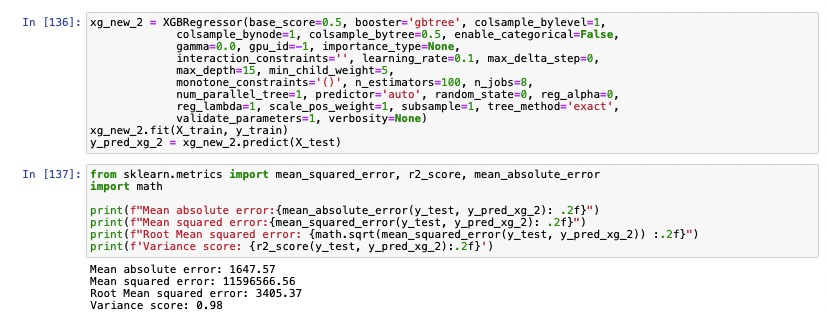

## Decision Tree HPO

In [124]:
params = {"min_samples_split": [5, 10],
              "max_depth": [10000, 15000, 20000, 25000, 30000],
              "min_samples_leaf": [5, 10],
              "max_leaf_nodes": [10000, 15000, 20000, 25000, 30000],
              }

In [125]:
dt_regressor = DecisionTreeRegressor()
tuning_model=RandomizedSearchCV(dt_regressor,param_distributions=parameters,cv=3,verbose=3)
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=500, max_features=None, max_leaf_nodes=600, min_samples_leaf=90, min_weight_fraction_leaf=0.3, splitter=best;, score=0.059 total time=   0.1s
[CV 2/3] END max_depth=500, max_features=None, max_leaf_nodes=600, min_samples_leaf=90, min_weight_fraction_leaf=0.3, splitter=best;, score=0.058 total time=   0.1s
[CV 3/3] END max_depth=500, max_features=None, max_leaf_nodes=600, min_samples_leaf=90, min_weight_fraction_leaf=0.3, splitter=best;, score=0.061 total time=   0.1s
[CV 1/3] END max_depth=900, max_features=log2, max_leaf_nodes=200, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=900, max_features=log2, max_leaf_nodes=200, min_samples_leaf=10, min_weight_fraction_leaf=0.7, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=900, max_features=log2, max_leaf_nodes=200, min_samples_leaf=10, min_weight_fraction_leaf=0.7, 

C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [100, 300, 500, 700, 900],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 100, 200, 300,
                                                           400, 500, 600, 700,
                                                           800, 900],
                                        'min_samples_leaf': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4,
                                                                     0.5, 0.6,
                        

In [126]:
tuning_model.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.3,
 'min_samples_leaf': 90,
 'max_leaf_nodes': 600,
 'max_features': None,
 'max_depth': 500}

In [127]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=500,max_features=None,max_leaf_nodes=600,min_samples_leaf=60,min_weight_fraction_leaf=0.3,splitter='best')

In [128]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=500, max_leaf_nodes=600, min_samples_leaf=60,
                      min_weight_fraction_leaf=0.3)

In [105]:
y_pred=tuned_hyper_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 12872.33270698959
Mean Squared Error: 423846554.0404928
Root Mean Squared Error: 20587.533947524964
Variance score: 0.19


In [111]:
#2nd test
y_pred=tuned_hyper_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 14647.81865020511
Mean Squared Error: 495892110.50170743
Root Mean Squared Error: 22268.63512884675
Variance score: 0.05


In [123]:
#3rd test
y_pred=tuned_hyper_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 13256.57543015949
Mean Squared Error: 434122521.3083252
Root Mean Squared Error: 20835.607053991134
Variance score: 0.17


In [129]:
#4th test
y_pred=tuned_hyper_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute Error: 14605.20089238108
Mean Squared Error: 491609734.7437652
Root Mean Squared Error: 22172.274009306424
Variance score: 0.06


# FINAL MODEL

In [255]:
df_train = pd.read_csv('./datasets/cleaned_training_data_with_yearly_week.csv')

In [206]:
df_test_data_original = pd.read_csv('./datasets/test_merge_with_features_and_stores.csv')

In [242]:
df_test_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   Date          115064 non-null  object 
 3   IsHoliday     115064 non-null  bool   
 4   Temperature   115064 non-null  float64
 5   Fuel_Price    115064 non-null  float64
 6   MarkDown1     114915 non-null  float64
 7   MarkDown2     86437 non-null   float64
 8   MarkDown3     105235 non-null  float64
 9   MarkDown4     102176 non-null  float64
 10  MarkDown5     115064 non-null  float64
 11  CPI           76902 non-null   float64
 12  Unemployment  76902 non-null   float64
 13  Type          115064 non-null  object 
 14  Size          115064 non-null  int64  
dtypes: bool(1), float64(9), int64(3), object(2)
memory usage: 12.4+ MB


In [244]:
df_test_data_original['Date'] = pd.to_datetime(df_test_data_original['Date'])

In [245]:
df_test = df_test_data_original[['Date','Store','Dept','Size']]

In [246]:
df_test['week'] = df_test_data_original['Date'].dt.week

C:\Users\Thomas\AppData\Local\Temp/ipykernel_10088/2006317412.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_test['week'] = df_test_data_original['Date'].dt.week
C:\Users\Thomas\AppData\Local\Temp/ipykernel_10088/2006317412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['week'] = df_test_data_original['Date'].dt.week


In [247]:
df_test

,Date,Store,Dept,Size,week
0,2012-11-02,1,1,151315,44
1,2012-11-02,1,2,151315,44
2,2012-11-02,1,3,151315,44
3,2012-11-02,1,4,151315,44
4,2012-11-02,1,5,151315,44
...,...,...,...,...,...
115059,2013-07-26,45,93,118221,30
115060,2013-07-26,45,94,118221,30
115061,2013-07-26,45,95,118221,30
115062,2013-07-26,45,97,118221,30


In [248]:
df_test['B'] = df_test_data_original['Type'].apply(lambda x: 1 if x =='B' else 0)

C:\Users\Thomas\AppData\Local\Temp/ipykernel_10088/3323517433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['B'] = df_test_data_original['Type'].apply(lambda x: 1 if x =='B' else 0)


In [249]:
df_test = df_test.drop('Date',axis = 1)

In [252]:
df_test.columns

Index(['Store', 'Dept', 'Size', 'week', 'B'], dtype='object')

In [256]:
df_train

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,B,C,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,151315,0,0,2,5
1,1,2,50605.27,0,42.31,2.572,211.096358,8.106,151315,0,0,2,5
2,1,3,13740.12,0,42.31,2.572,211.096358,8.106,151315,0,0,2,5
3,1,4,39954.04,0,42.31,2.572,211.096358,8.106,151315,0,0,2,5
4,1,5,32229.38,0,42.31,2.572,211.096358,8.106,151315,0,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,58.85,3.882,192.308899,8.667,118221,1,0,10,43
421566,45,94,5203.31,0,58.85,3.882,192.308899,8.667,118221,1,0,10,43
421567,45,95,56017.47,0,58.85,3.882,192.308899,8.667,118221,1,0,10,43
421568,45,97,6817.48,0,58.85,3.882,192.308899,8.667,118221,1,0,10,43


In [257]:
df_train = df_train[['Store', 'Dept', 'Size', 'week', 'B','Weekly_Sales']]

In [258]:
y = df_train['Weekly_Sales']
X = df_train.drop('Weekly_Sales',axis = 1)

In [259]:
X

,Store,Dept,Size,week,B
0,1,1,151315,5,0
1,1,2,151315,5,0
2,1,3,151315,5,0
3,1,4,151315,5,0
4,1,5,151315,5,0
...,...,...,...,...,...
421565,45,93,118221,43,1
421566,45,94,118221,43,1
421567,45,95,118221,43,1
421568,45,97,118221,43,1


In [260]:
df_test

,Store,Dept,Size,week,B
0,1,1,151315,44,0
1,1,2,151315,44,0
2,1,3,151315,44,0
3,1,4,151315,44,0
4,1,5,151315,44,0
...,...,...,...,...,...
115059,45,93,118221,30,1
115060,45,94,118221,30,1
115061,45,95,118221,30,1
115062,45,97,118221,30,1


In [261]:
#random forest with the 5 most prominent features:

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#rf_regressor.fit(X_train.drop(, y_train)  forest with the 3 most prominent features:


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))   #set the output range

X = sc.fit_transform(X)
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

rf_regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
 
# fit the regressor with x and y data
rf_regressor.fit(X, y) 

RandomForestRegressor(n_estimators=10, random_state=42)

In [262]:
y_pred = rf_regressor.predict(df_test)

C:\Users\Thomas\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [225]:
df_test['weekly_sales'] = y_pred

In [226]:
df_test

,Store,Dept,Size,week,B,weekly_sales
0,1,1,151315,1,0,287.566167
1,1,2,151315,1,0,287.566167
2,1,3,151315,1,0,287.566167
3,1,4,151315,1,0,287.566167
4,1,5,151315,1,0,287.566167
...,...,...,...,...,...,...
115059,45,93,118221,4,1,287.566167
115060,45,94,118221,4,1,287.566167
115061,45,95,118221,4,1,287.566167
115062,45,97,118221,4,1,287.566167


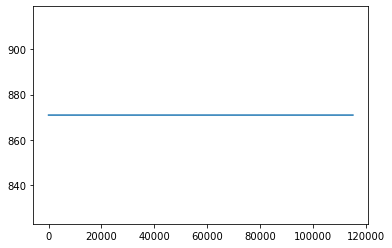

In [264]:
plt.plot(y_pred)